In [1]:
options(repr.plot.width=6, repr.plot.height=4)

# Data Visualization
---
Data visualization involves the creation and study of the visual representation of data. To communicate information clearly and efficiently, data visualization uses statistical graphics, plots, information graphics and other tools. Effective visualization helps users analyze and reason about data and evidence. It makes complex data more accessible, understandable and usable.

`ggplot2` is the most popular package for data visualization in R. Created by Hadley Wickham, `ggplot2` is an implementation of Leland Wilkinson's *Grammar of Graphics*— a general scheme for data visualization which breaks up graphs into semantic components such as scales and layers. `ggplot2` can serve as a replacement for the base graphics in R.


## Overview of `ggplot2`

In this notebook we will focus on `ggplot2` and will try to cover its main functionalities. If you have followed the **Setup** notebook you should already have `ggplot2` installed since it's a part of `tidyverse` library. Before being able to use a package we need to first load it into the environment by

> `library(ggplot2)`

Alternatively one can load the entire `tidyverse` to include all of its core packages:

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


These 8 packages are used in almost every data analysis in R. The last two lines are warning that you can ignore for now.

### First graph
Let's use one of the datasets that come with `ggplot2` to make a graph and answer a simple question. 

**Question**: Do cars with big engines use more fuel than cars with small engines?

**dataset**: `mpg` - contains fuel economy data from 1999 and 2008 for 38 popular models of car. 

Another way of calling a dataset that comes from a package is to specify the package name first followed by two colons, e.g.: `ggplot2::mpg`. This is optional, but a good practice for extra clarity if needed.

To see the content of `mpg` you can simply type
> `mpg`

in the console (or a notebook cell). To avoid getting too many rows back in the notebook I use `head()` function from base R to only load the first few rows. If you are using RStudio then by just typing `mpg` you should get the right amount of output that fits in your screen, it's because `mpg` is a `tibble`, we will learn more about `tibbles` later.

In [3]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Among the variables in `mpg` are
* `displ`, a car's engine size, in litres.
* `hwy`, a car's fuel efficiency on the highway, in miles per gallon (mpg). A car with a low fuel efficiency consumes more fuel than a car with a high fuel efficiency when they travel the same distance.

To access the help page and find out more about this data frame use `?mpg` command or press **F1**. A data frame is a rectangular collection of variables (in the columns) and observations (in the rows).

#### Creating a ggplot
To plot `mpg`, run this code to put `displ` on the x-axis and `hwy` on the y-axis:

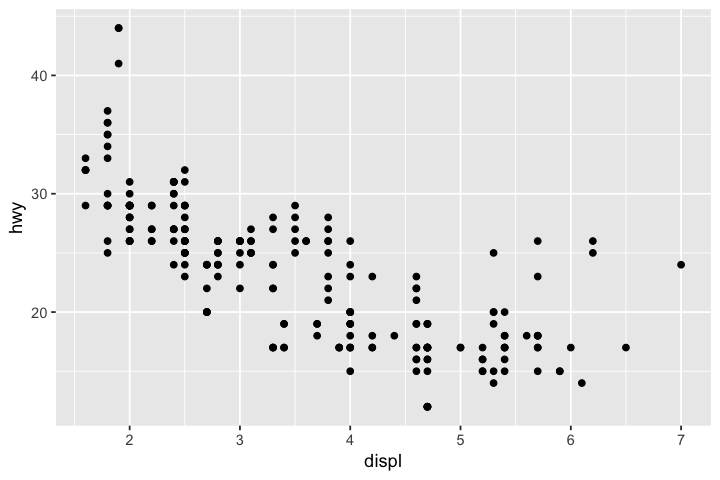

In [4]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

The plot shows a negative relationship between engine size (`displ`) and fuel efficiency (`hwy`). In other words, cars with big engines use more fuel.

With `ggplot2`, you begin a plot with the function `ggplot()`. `ggplot()` creates a coordinate system that you can add layers to. The first argument of `ggplot()` is the dataset to use in the graph. `ggplot(data = mpg)` creates an empty graph.

You complete your graph by adding one or more layers to `ggplot()`. The function `geom_point()` adds a layer of points to your plot, which creates a scatterplot. `ggplot2` comes with many geom functions that each add a different type of layer to a plot. You'll learn a whole bunch of them throughout this notebook.

Each geom function in `ggplot2` takes a `mapping` argument. This defines how variables in your dataset are mapped to visual properties. The `mapping` argument is always paired with `aes()`, and the `x` and `y` arguments of `aes()` specify which variables to map to the x and y axes. `ggplot2` looks for the mapped variable in the `data` argument, in this case, `mpg`.

### The grammar of graphics
As mentioned earlier `ggplot2` breaks up graphs into semantic components such as scales and layers. For instance the graph we just plotted consists of the following three layers
<img src="../png/3-layers-ggplot.png" width="400px" align="center">

These three layers are the minimum requirements for the data to be visualized.

**Data -**
The source of information to be plotted. 
> `ggplot(data = mpg)`

This statement by itself would result in an empty canvas. In order to show the points we need the other two layers.

**Aestetics -**
For specifying the attributes of the plot. The aesthetics mapping describe how variables in the data are mapped to visual properties of the geometric objects. The `mapping` argument is always paired with `aes()`.
> `mapping = aes(x = displ, y = hwy)`

**Geometrics -**
Specifies the geometric object to be used for data visualization. For the example above we have used `geom_point()` to show the data points in a scatterplot.
> ```ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))``` 

#### A graphing template
We can use the following template which represents these 3 layers. Replace the bracketed sections in the code below with a dataset, a geom function, or a collection of mappings:
> ```ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))```

##### There are four more layers in `ggplot2`#####
<img src="../png/layers-of-ggplot.png" width="400px" align="center">

**Facets -**
Allow us to visualize multiple groups of the same data within one canvas. For example, in our example one could group the cars by their `drv`
* 4: Four-wheel drive
* f: Front-wheel drive
* r: Rear-wheel drive

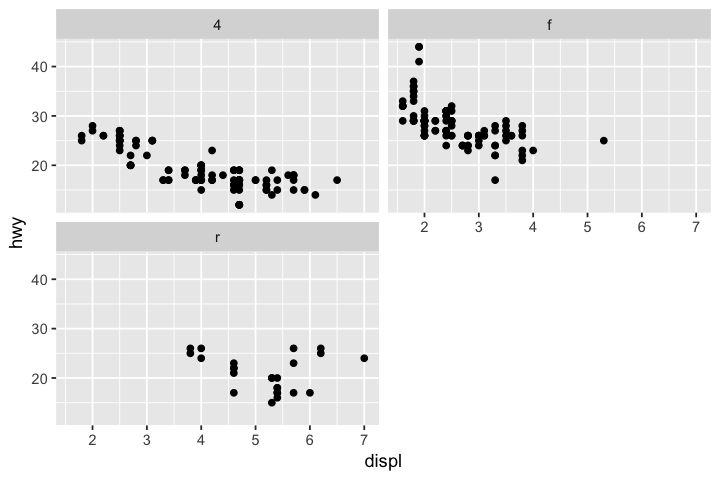

In [5]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ drv, nrow = 2)

**Statistics**
This layer is to summarize or transform the data before plotting it. For instance we can fit a line to the previous plot by `geom_smooth()`

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


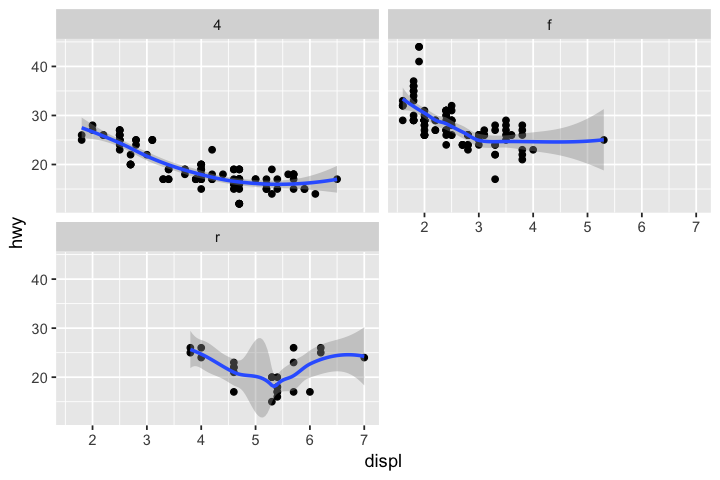

In [6]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ drv, nrow = 2) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

**Coordinates**


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


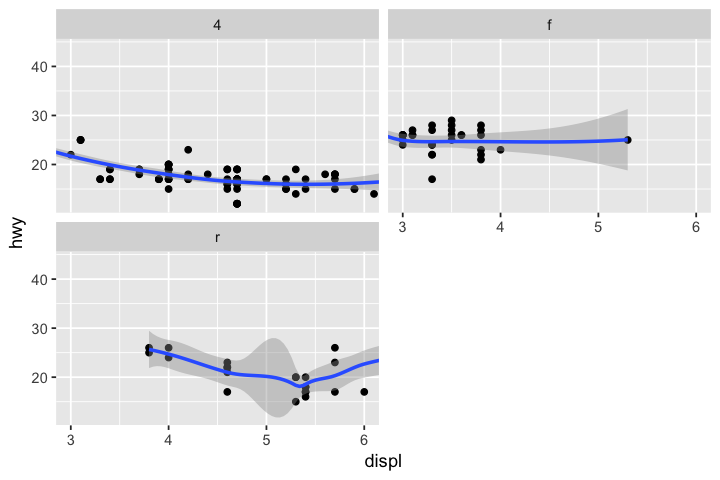

In [7]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ drv, nrow = 2) +
  geom_smooth(mapping = aes(x = displ, y = hwy)) +
  coord_cartesian(xlim = c(3, 6))

**Themes**


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


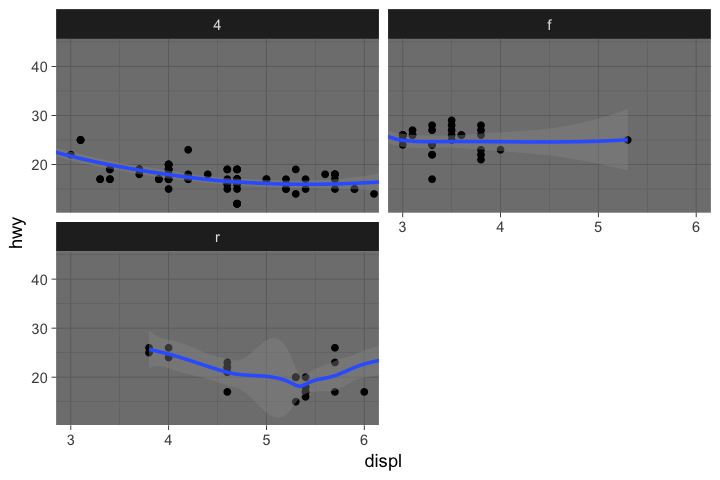

In [8]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ drv, nrow = 2) +
  geom_smooth(mapping = aes(x = displ, y = hwy)) +
  coord_cartesian(xlim = c(3, 6)) +
  theme_dark()

---
Now that we have a general idea of all the seven layers of `ggplot2` let's take a deeper dive into some of them.

## Aesthetics
Looking back at the first graph we made, we see that there are a few car models that despite their engine size are relatively efficient (~25 mpg) and seem to fall out of the linear trend (blue circles). How can we explain these cars? 

<img src="../png/mpg_outliers.png" width="600px" align="left">  

We might be able to explain it by their class attribute, after all not all large engine vehicles are SUV. Let's use `class` column to color the points. To do this we need to map this field to an **aesthetic**. An aesthetic is a visual property of the objects in our plot. Aesthetics include things like size, shape, or the color of our points.

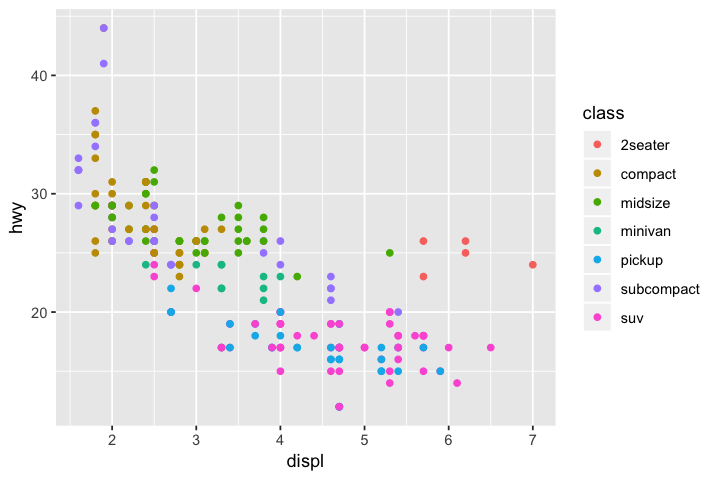

In [9]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

The colors reveal that many of the unusual points are two-seater cars. These sports cars have large engines like SUVs and pickup trucks, but small bodies like midsize and compact cars, which improves their gas mileage.

We can set the scale color:

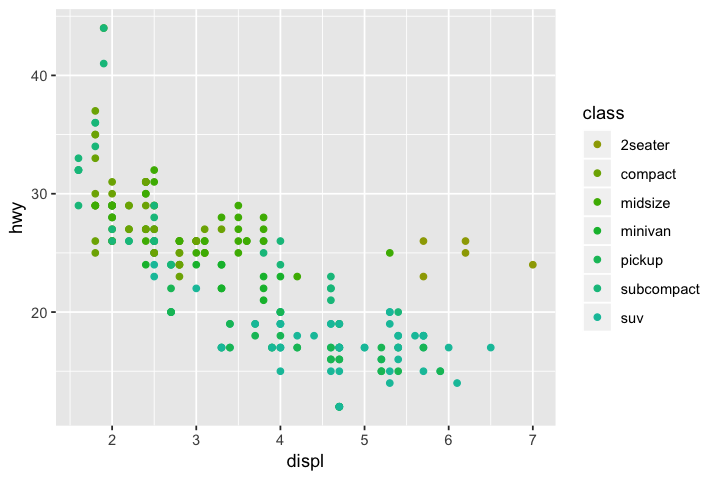

In [29]:
# Change range of hues used
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class)) +
  scale_color_hue(h = c(90, 180))

In [ ]:
# Set manually 
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class)) +
  scale_color_manual(values = c("#f44242", "#f47741", "#f4c441", "#dff441", "#82f441", "#41f4e8", "#419af4"))

You can also set the aesthetic properties of your geom manually. For example, we can make all of the points in our plot blue:

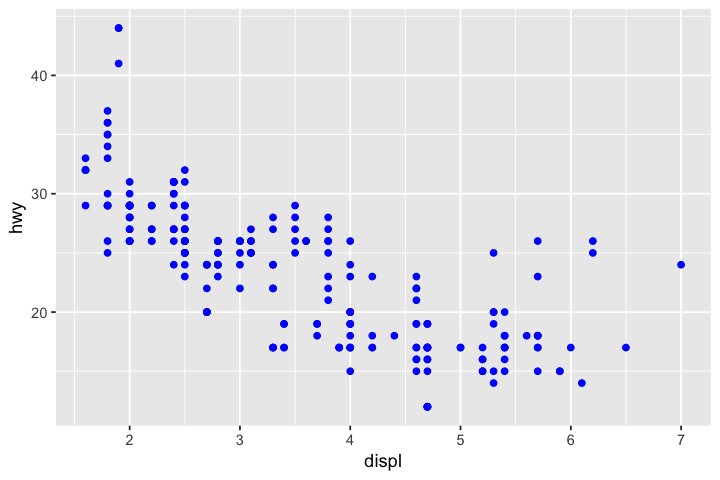

In [17]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

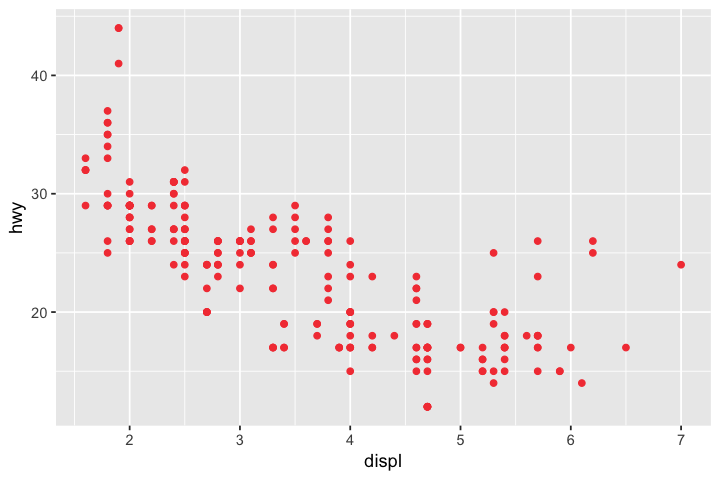

In [18]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "#f44242") # hex coloring

In [17]:
scale_color_hue

---
## Exercise 1
Besides `color` (aka `colour`), one could also map `class` to other aesthetics such as `shape`, `size`, and `alpha`. As a practice, using the above code try to regenerate the plot experimenting with different mappings.

In [13]:
# Your answer goes here

---
## Exercise 2
What's gone wrong with this code? Why are the points not blue?

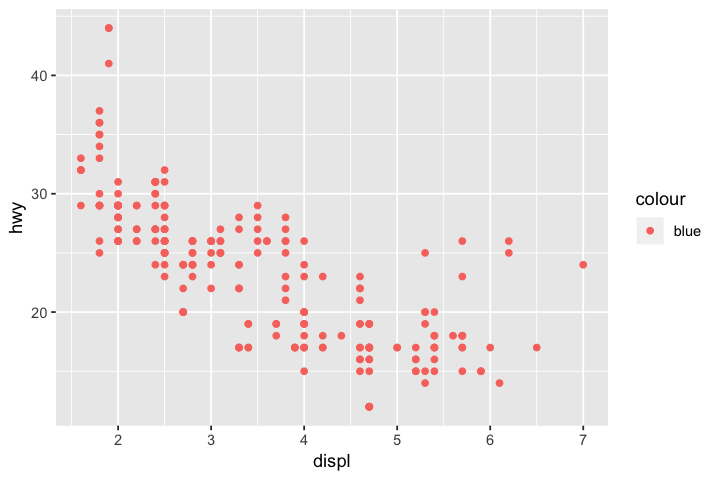

In [15]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))

In [ ]:
# Your answer goes here

---
## Exercise 3
Which variables in `mpg` are categorical? Which variables are continuous? (Hint: type `?mpg` to read the documentation for the dataset). How can you see this information when you run `mpg`?

In [16]:
# Your answer goes here

---
## Exercise 4
Map a continuous variable to `color`, `size`, and `shape`. How do these aesthetics behave differently for categorical vs. continuous variables?

In [13]:
# Your answer goes here

---
## Exercise 5
What happens if you map the same variable to multiple aesthetics?

In [13]:
# Your answer goes here

---
## Exercise 6
What does the `stroke` aesthetic do? What shapes does it work with? (Hint: use `?geom_point`)

In [13]:
# Your answer goes here

---
## Exercise 7
What happens if you map an aesthetic to something other than a variable name, like `aes(color = displ < 5)`?

In [ ]:
# Your answer goes here

---
## Facets


# Additional Recourses
* *ggplot2-cheatsheet.pdf* in the cheatsheets directory
* Hex color
    * Simply google "hex color picker" and use Google's tool
    * There are many other online sources, a highly customizable tool can be found in [Mozilla](https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Colors/Color_picker_tool)
